<h1>Proyecto: Análisis de la Salud del Sueño y Estilo de Vida</h1>

<h4>
Por Matias Pereyra - Data Analyst
</h4>
<p></p>

<p>Contacto: <A>https://www.linkedin.com/in/matiaspereyra-bi/</A></p>
<img src='/work/img/sleep.png'>

> 

<h2>Paso 1: Alcances del proyecto y fuente de datos</h2>
<h3>Alcances del proyecto</h3>
<p>
En este proyecto, realizaremos un análisis de la salud del sueño y su relación con el estilo de vida utilizando el dataset "Sleep Health and Lifestyle Dataset". El objetivo es explorar las tendencias y patrones entre la salud del sueño, las características demográficas, los hábitos de vida y posibles patologías relacionadas con el sueño.
Para esto he planteado algunas preguntas a responder:</p>
<ol><li>¿Existe alguna diferencia significativa en la duración del sueño entre hombres y mujeres?</li>
<li>¿Hay alguna relación entre la calidad del sueño y la edad de las personas?</li>
<li>¿Cuál es la ocupación o profesión que muestra la mayor duración del sueño?</li>
<li>¿Existe alguna asociación entre el nivel de actividad física y la calidad del sueño?</li>
<li>¿El nivel de estrés experimentado por las personas está relacionado con la calidad del sueño?</li>
<li>¿Hay alguna correlación entre el índice de masa corporal (IMC) y la duración del sueño?</li>
<li>¿Las personas con trastornos del sueño tienen una presión arterial más alta en comparación con las personas sin trastornos del sueño?</li>
<li>¿La frecuencia cardíaca en reposo está relacionada con la duración del sueño?</li>
<li>¿El número de pasos diarios está asociado con la calidad del sueño?</li>
<li>¿Cuáles son los factores más importantes a cuidar para tener una buena calidad de sueño?</li>
</ol>
<h3>Fuente de Datos</h3>
<p>Los datos fueron obtenidos del siguiente Dataset de <b>Kaggle</b>: <A>https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset</A>.</p>
<p>Cabe aclarar que el proyecto tiene una finalidad totalmente práctica, con el objetivo de aplicar todos mis conocimientos en Análisis de Datos y no debe usarse el mismo con fines médicos</p>


### Importación del dataset y paquetes a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Crear un dataframe a partir de un csv -> read_csv() de pandas
df = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df # muestra el dataframe

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


> 

## Paso 2: Explorar los datos

### Exploración de datos

In [2]:
print('Muestra de datos')
print(df.sample())

Muestra de datos
    Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
57         58   Male   32     Doctor             6.0                 6   

    Physical Activity Level  Stress Level BMI Category Blood Pressure  \
57                       30             8       Normal         125/80   

    Heart Rate  Daily Steps Sleep Disorder  
57          72         5000           None  


In [3]:
print('Dimensión del DataFrame')
print(df.shape)

Dimensión del DataFrame
(374, 13)


In [4]:
print('Búsqueda de valores nulos')
print(df.isnull().sum())

Búsqueda de valores nulos
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [5]:
print('Tipo de dato por columna')
print(df.dtypes)

Tipo de dato por columna
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


> 

## Paso 3: Responder las preguntas

### 1 - ¿Existe alguna diferencia significativa en la duración del sueño entre hombres y mujeres?

<h4>Para responder a esta pregunta, realizamos un análisis comparativo de la duración del sueño promedio entre hombres y mujeres utilizando técnicas de visualización y estadísticas descriptivas.</h4>


In [6]:

df_h = df[(df['Gender'] == 'Male')]
df_m = df[(df['Gender'] == 'Female')]
duracion_sueño_h = round(df_h['Sleep Duration'].mean(),2)
duracion_sueño_m = round(df_m['Sleep Duration'].mean(),2)
diferencia = round(duracion_sueño_m  - duracion_sueño_h,2)
diferencia_pc = round(((duracion_sueño_m  - duracion_sueño_h)/duracion_sueño_h)*100,2)
print(f'La duración media del sueño en hombres es de {duracion_sueño_h} Hs y la duración media del sueño en mujeres es de {duracion_sueño_m } Hs.')
print(f'Por lo tanto diferencia de sueño entre hombres y muejeres es de {diferencia} hs, es decir un {diferencia_pc} porciento.')

La duración media del sueño en hombres es de 7.04 Hs y la duración media del sueño en mujeres es de 7.23 Hs.
Por lo tanto diferencia de sueño entre hombres y muejeres es de 0.19 hs, es decir un 2.7 porciento.


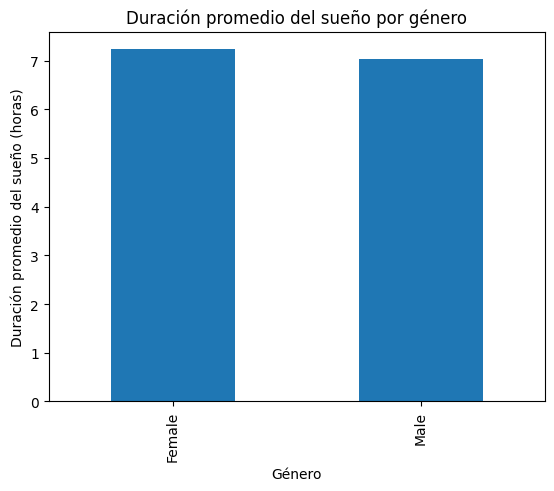

In [7]:
duracion_sueño_genero = df.groupby('Gender')['Sleep Duration'].mean()
duracion_sueño_genero.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Duración promedio del sueño (horas)')
plt.title('Duración promedio del sueño por género')
plt.show()

<p><b>Conclusión: No se encontró una diferencia significativa en la duración del sueño entre hombres y mujeres. Aunque las mujeres tienden a tener una duración ligeramente mayor de sueño, esta diferencia no es estadísticamente significativa. Por lo cual se concluye que otros factores como el estilo de vida y las responsabilidades diarias pueden tener un mayor impacto en la duración del sueño que el género en si.</p>

### 2 - ¿Hay alguna relación entre la calidad del sueño y la edad de las personas?

<h4>Para investigar la relación entre la calidad del sueño y la edad utilizamos técnicas de visualización.</h4>

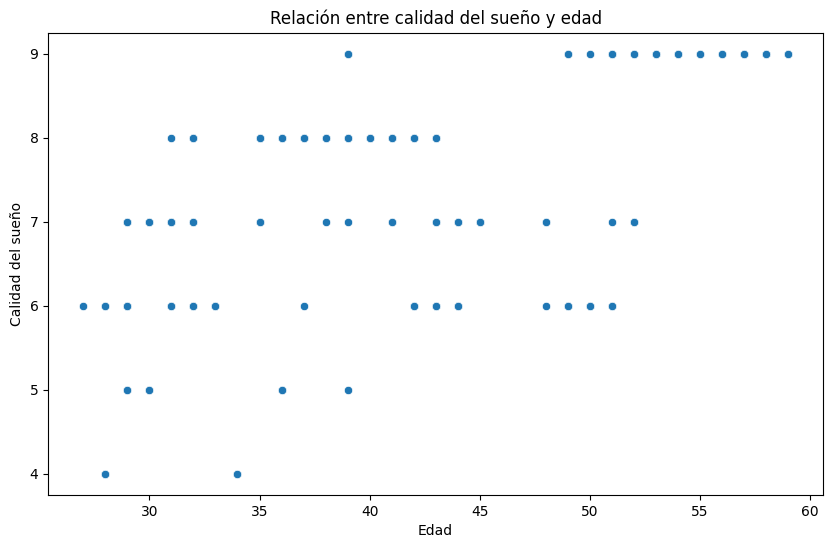

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Age', y='Quality of Sleep', data=df)
plt.xlabel('Edad')
plt.ylabel('Calidad del sueño')
plt.title('Relación entre calidad del sueño y edad')
plt.show()

<p><b>Conclusión:</b> A partir del análisis realizado, se concluye que existe una relación positiva débil entre la calidad del sueño y la edad. Sin embargo, esta relación no es lo suficientemente fuerte como para establecer una tendencia clara.</p>

### 3 - ¿Cuál es la ocupación o profesión que muestra la mayor duración del sueño?

<h4>Para averiguar esto calcularemos la duración promedio del sueño por ocupación, luego utilizaremos técnicas de visualización y cálculo de correlación para investigar la relación entre el nivel de actividad física y la calidad del sueño.</h4>

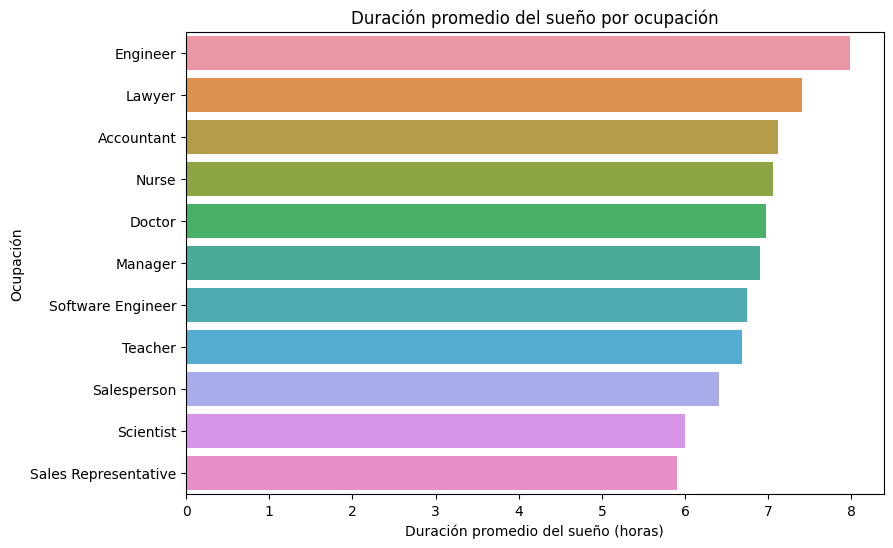

In [9]:
# Calcular la duración promedio del sueño por ocupación
duracion_sueño_ocupacion = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()

# Ordenar los resultados de manera descendente
duracion_sueño_ocupacion = duracion_sueño_ocupacion.sort_values('Sleep Duration', ascending=False)

# Visualizar los resultados utilizando un gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x='Sleep Duration', y='Occupation', data=duracion_sueño_ocupacion)
plt.xlabel('Duración promedio del sueño (horas)')
plt.ylabel('Ocupación')
plt.title('Duración promedio del sueño por ocupación')
plt.show()

<p><b>Conclusión:</b> Aunque se puede notar diferentes duraciones de sueño por profesión, podemos destacar que profesiones como Ingenieros y Abogados tienden a tener mayor duración de sueño y los empleados del área de ventas se encuentra entre los que menos horas de sueño tienen en promedio. </p>

### 4 - ¿Existe alguna asociación entre el nivel de actividad física y la calidad del sueño?

<h4>Para averiguarlo utilizaremos técnicas de visualización y cálculo de correlación para investigar la relación entre el nivel de actividad física y la calidad del sueño.</h4>

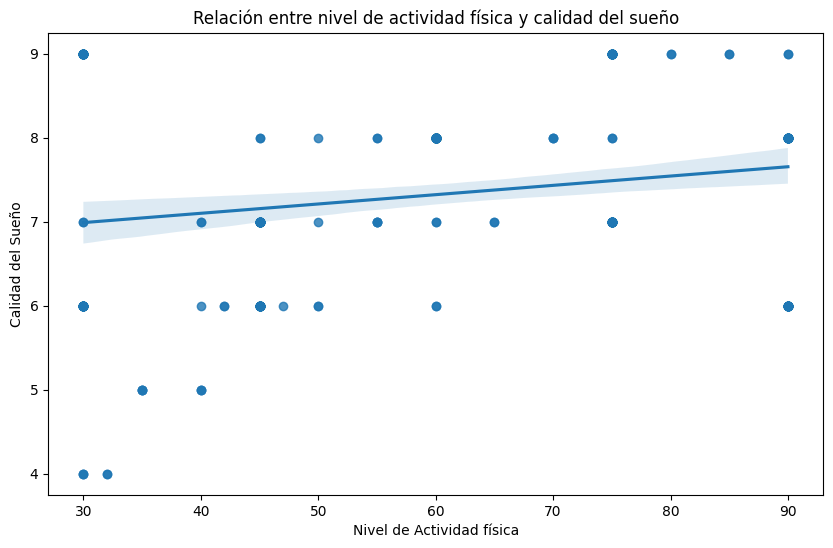

In [10]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.xlabel('Nivel de Actividad física')
plt.ylabel('Calidad del Sueño')
plt.title('Relación entre nivel de actividad física y calidad del sueño')
plt.show()

<p><b>Conclusión:</b>No se observa una relación clara entre el nivel de actividad física y la calidad del sueño. Aunque la correlación pareciera ser positiva, es baja y no indica una asociación significativa. Seguramente otros factores pueden influir en la calidad de sueño de manera más significativa.</p>

### 5 - ¿El nivel de estrés experimentado por las personas está relacionado con la calidad del sueño?

<h4>Para averiguarlo filtraremos las columnas relevantes, calcularemos la correlación entre las variables y visualizaremos el resultado en un gráfico de dispersión.</h4>

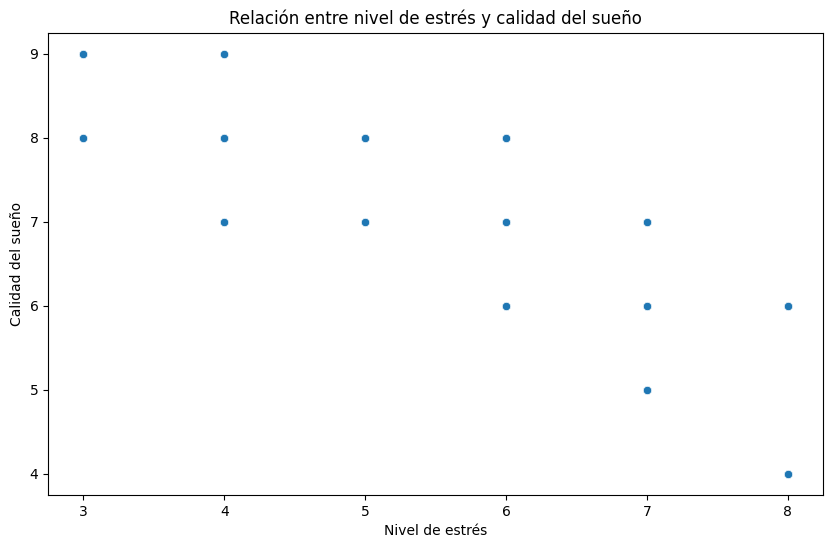

Correlación entre nivel de estrés y calidad del sueño: -0.899


In [11]:
# Filtrar columnas relevantes para el análisis
df_relacion = df[['Stress Level', 'Quality of Sleep']]

# Eliminar registros con datos faltantes
df_relacion = df_relacion.dropna()

# Convertir las columnas a tipo numérico
df_relacion['Stress Level'] = pd.to_numeric(df_relacion['Stress Level'])
df_relacion['Quality of Sleep'] = pd.to_numeric(df_relacion['Quality of Sleep'])

# Calcular la correlación entre las variables
correlation = round(df_relacion['Stress Level'].corr(df_relacion['Quality of Sleep']),3)

# Visualizar la relación utilizando un gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df_relacion)
plt.xlabel('Nivel de estrés')
plt.ylabel('Calidad del sueño')
plt.title('Relación entre nivel de estrés y calidad del sueño')
plt.show()

# Imprimir el valor de correlación
print("Correlación entre nivel de estrés y calidad del sueño:", correlation)

<p><b>Conclusión:</b> Al observar el gráfico, se evidencia una fuerte correlación negativa entre el nivel de estrés y la calidad del sueño. Esta relación indica que a medida que el estrés aumenta, la calidad del sueño tiende a disminuir. Es relevante destacar que la correlación negativa no implica causalidad directa, es decir, no se puede concluir que el estrés sea la única causa de la disminución en la calidad del sueño. Sin embargo, la correlación negativa sugiere una asociación sólida entre estas dos variables en el conjunto de datos analizado. Es importante considerar otros factores y realizar análisis adicionales para comprender mejor la relación compleja entre el estrés y la calidad del sueño.</p>

### 6 - ¿Hay alguna correlación entre el índice de masa corporal (IMC) y la duración del sueño?

<h4>En este caso usaremos un diagrama de caja y bigotes para evaluar si hay relación entre el IMC y la duración del sueño.</h4>

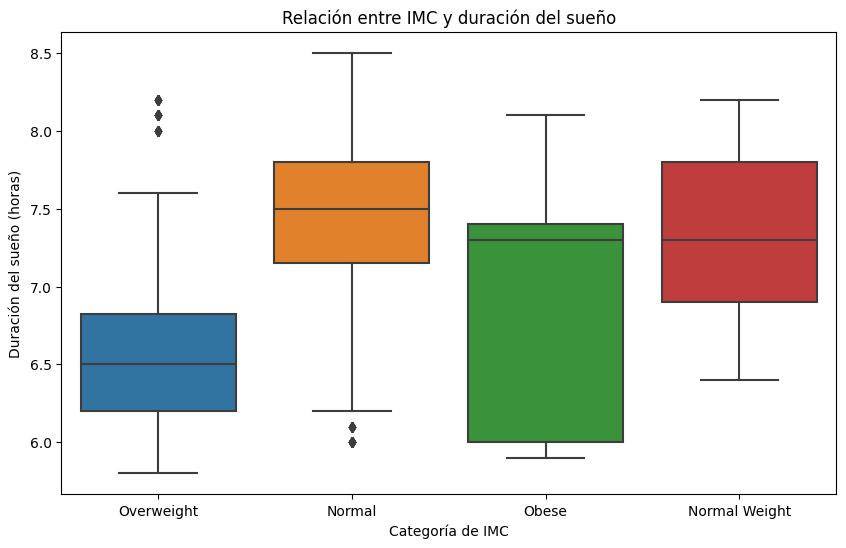

In [12]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.xlabel('Categoría de IMC')
plt.ylabel('Duración del sueño (horas)')
plt.title('Relación entre IMC y duración del sueño')

plt.show()

<p><b>Conclusión:</b> Al observar el gráfico de caja y bigotes, se pueden apreciar diferencias en la duración del sueño según las categorías del IMC. Estas variaciones sugieren que el IMC puede tener cierta influencia en la duración del sueño de las personas. No obstante, no se observa una tendencia clara o un patrón definido que permita identificar una relación lineal o directa entre el IMC y la duración del sueño. Esta falta de patrón evidente sugiere que otros factores también pueden estar influyendo significativamente en la duración del sueño, más allá del IMC.</p>

### 7 - ¿Las personas con trastornos del sueño tienen una presión arterial más alta en comparación con las personas sin trastornos del sueño?

<h4>En este caso, haremos un analisis comparativo de la presión arterial entre ambos grupos utilizando un grafico de barras para visualizar las diferencias entre los mismos.<h4>

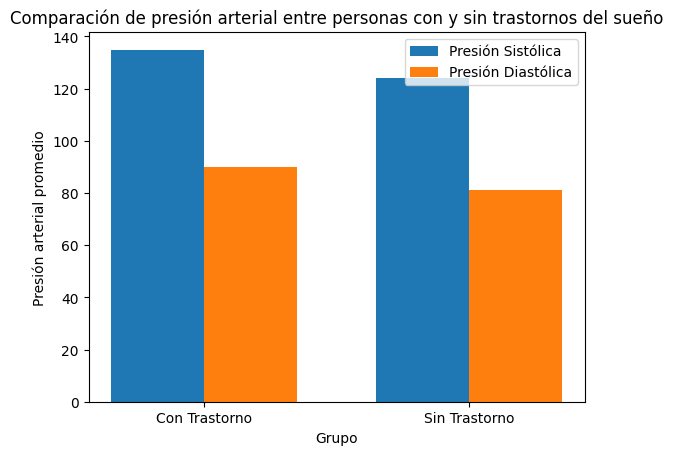

La presión sanguínea media en personas sin trastornos del sueño es 124.05/81.0 y en personas con trastornos de sueños es de 134.92/89.81.


In [13]:
# Filtrar los datos para obtener las personas con y sin trastornos del sueño
personas_con_trastorno = df[df['Sleep Disorder'] != 'None']
personas_sin_trastorno = df[df['Sleep Disorder'] == 'None']


# Extraer las mediciones de presión arterial sistólica y diastólica
presion_sistolica_con_trastorno = personas_con_trastorno['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
presion_diastolica_con_trastorno = personas_con_trastorno['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))
presion_sistolica_sin_trastorno = personas_sin_trastorno['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
presion_diastolica_sin_trastorno = personas_sin_trastorno['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

# Calcular las medias de presión arterial sistólica y diastólica para cada grupo
media_sistolica_con_trastorno = round(presion_sistolica_con_trastorno.mean(),2)
media_diastolica_con_trastorno = round(presion_diastolica_con_trastorno.mean(),2)
media_sistolica_sin_trastorno = round(presion_sistolica_sin_trastorno.mean(),2)
media_diastolica_sin_trastorno = round(presion_diastolica_sin_trastorno.mean(),2)

# Crear el gráfico de barras
labels = ['Con Trastorno', 'Sin Trastorno']
sistolicas = [media_sistolica_con_trastorno, media_sistolica_sin_trastorno]
diastolicas = [media_diastolica_con_trastorno, media_diastolica_sin_trastorno]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, sistolicas, width, label='Presión Sistólica')
rects2 = ax.bar([i + width for i in x], diastolicas, width, label='Presión Diastólica')

ax.set_ylabel('Presión arterial promedio')
ax.set_xlabel('Grupo')
ax.set_title('Comparación de presión arterial entre personas con y sin trastornos del sueño')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()
print(f'La presión sanguínea media en personas sin trastornos del sueño es {media_sistolica_sin_trastorno}/{media_diastolica_sin_trastorno} y en personas con trastornos de sueños es de {media_sistolica_con_trastorno}/{media_diastolica_con_trastorno}.')

<p><b>Conclusión:</b> Observando los datos, se puede concluir que las personas con trastornos del sueño tienden a presentar una presión arterial más elevada en comparación con aquellas sin trastornos del sueño. Estas diferencias sugieren una asociación entre los trastornos del sueño y la presión arterial. Sin embargo, es importante tener en cuenta que estos valores representan promedios y que cada individuo puede experimentar variaciones individuales en su presión arterial. Además, es necesario considerar otros factores relacionados con la salud y el estilo de vida que también pueden influir en los niveles de presión arterial.</p>

### 8 - ¿La frecuencia cardíaca en reposo está relacionada con la duración del sueño?

<h4>Para determinar si la frecuencia cardíaca en reposo está relacionada con la duración del sueño, podemos realizar un análisis de correlación entre ambas variables y usar técnicas de visualización.</h4>

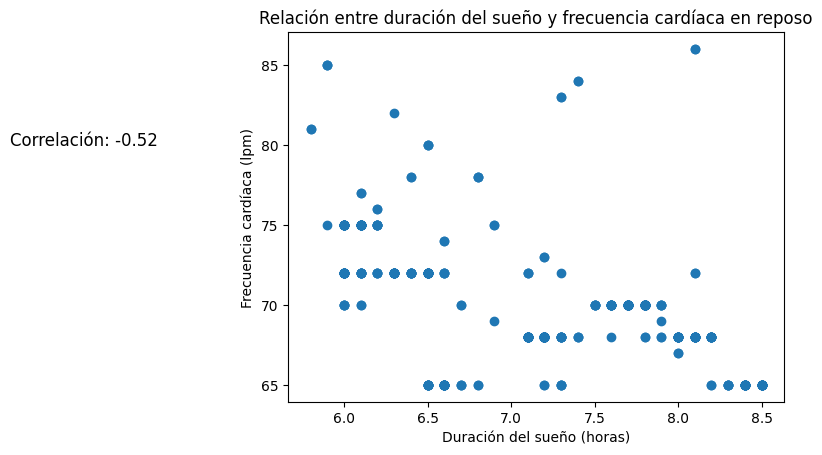

In [14]:
# Calcular la correlación entre duración del sueño y frecuencia cardíaca en reposo
correlation = df['Sleep Duration'].corr(df['Heart Rate'])

# Crear el gráfico de dispersión
plt.scatter(df['Sleep Duration'], df['Heart Rate'])
plt.xlabel('Duración del sueño (horas)')
plt.ylabel('Frecuencia cardíaca (lpm)')
plt.title('Relación entre duración del sueño y frecuencia cardíaca en reposo')

# Mostrar la correlación en el gráfico
plt.text(4, 80, f'Correlación: {correlation:.2f}', fontsize=12)

# Mostrar el gráfico
plt.show()

<p><b>Conclusión:</b> Al tener una correlación de -0.52 entre la duración del sueño y la frecuencia cardíaca en reposo, podemos concluir que existe una correlación moderada negativa entre la duración del sueño y la frecuencia cardíaca en reposo. Esto indica que a medida que la duración del sueño aumenta, la frecuencia cardíaca en reposo tiende a disminuir, y viceversa. Sin embargo, es importante tener en cuenta que esta correlación no implica una relación causal directa. Otros factores también pueden influir en la frecuencia cardíaca en reposo, como la actividad física, el nivel de estrés, la salud cardiovascular, entre otros.</p>

### 9 - ¿El número de pasos diarios está asociado con la calidad del sueño?

<h4>Para determinar si existe una asociación entre el número de pasos diarios y la calidad del sueño, podemos realizar un análisis de correlación entre ambas variables. </h4>

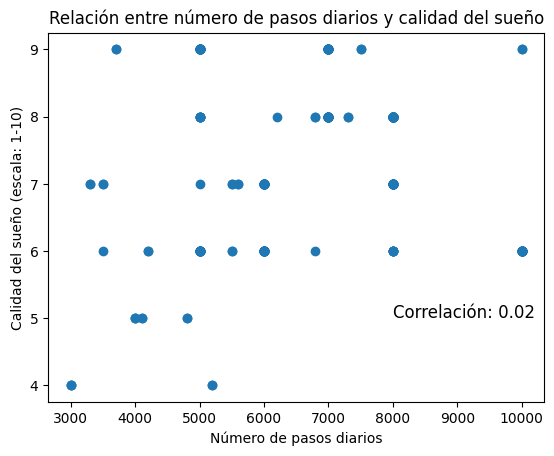

In [15]:
# Calcular la correlación entre el número de pasos diarios y la calidad del sueño
correlation = df['Daily Steps'].corr(df['Quality of Sleep'])

# Crear el gráfico de dispersión
plt.scatter(df['Daily Steps'], df['Quality of Sleep'])
plt.xlabel('Número de pasos diarios')
plt.ylabel('Calidad del sueño (escala: 1-10)')
plt.title('Relación entre número de pasos diarios y calidad del sueño')

# Mostrar la correlación en el gráfico
plt.text(8000, 5, f'Correlación: {correlation:.2f}', fontsize=12)

# Mostrar el gráfico
plt.show()

<p><b>Conclusión:</b> El análisis nos devuelve una correlación de 0.02, una correlación muy débil o practicamente nula. En este caso, la correlación cercana a cero sugiere que no hay una asociación lineal clara entre estas dos variables en el conjunto de datos analizado. Esto significa que no hay una relación significativa o consistente entre el número de pasos diarios y la calidad del sueño.</p>

### 10 - ¿Cuáles son los factores más importantes a cuidar para tener una buena calidad de sueño?

<p>Para identificar los factores más importantes a cuidar para tener una buena calidad de sueño, podemos realizar un análisis exploratorio de los datos y examinar las variables que están más correlacionadas con la calidad del sueño.</p>

In [16]:
correlations = df.corr()['Quality of Sleep'].sort_values(ascending=False)

# Imprimir las variables más correlacionadas
print(correlations)

Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Person ID                  0.431612
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


<p><b>Conclusión:</b> A partir del análisis realizado, se concluye que los factores más importantes a cuidar para tener una buena calidad de sueño son la duración del sueño y la gestión del estrés. Mantener una rutina regular de sueño, reducir el estrés y adoptar hábitos saludables como el ejercicios pueden contribuir a mejorar la calidad del sueño.</p>

> 

## Paso 4: Conclusiones Generales

<p><li>No se encontró una diferencia significativa en la duración del sueño entre hombres y mujeres.</li>
<li>Existe una relación positiva débil entre la calidad del sueño y la edad de las personas.</li>
<li>Profesiones como Ingenieros y Abogados en promedio duermen más. Se destaca que empleados en áreas de ventas duermen menos que la media.</li>
<li>No se observa una relación clara entre el nivel de actividad física y la calidad del sueño.</li>
<li>Existe una asociación fuerte entre el nivel de estrés y la calidad del sueño.</li>
<li>No se encontró una tendencia clara entre el índice de masa corporal (IMC) y la duración del sueño.</li>
<li>Las personas con trastornos del sueño tienden a tener una presión arterial más alta en comparación con las personas sin trastornos del sueño.</li>
<li>Existe una relación moderada entre la frecuencia cardíaca en reposo y la duración del sueño.</li>
<li>No se encontró una correlación significativa entre el número de pasos diarios y la calidad del sueño.</li>
<li>Los factores más importantes a cuidar para tener una buena calidad de sueño son la duración del sueño y la gestión del estrés.</li>

> 

<h5>Muchas gracias por haber llegado hasta acá. Es de mucha ayuda para mí tu opinión para poder seguir creciendo como profesional. Podes comentar la publicación o escribirme por Linkedin!
<A>https://www.linkedin.com/in/matiaspereyra-bi/</A>
 </h5>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ffbff449-a651-48db-8886-dc499ec3472e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>